<a href="https://colab.research.google.com/github/hewanshrestha/ML_Algorithms/blob/master/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K Means Clustering**

In [4]:
# importing the libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import seaborn as sns


In [7]:
# reading the dataset

data = pd.read_csv('driver-data.csv', index_col='id')
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [8]:
# creating a KMeans model

kmeans = KMeans(n_clusters=2)


In [9]:
# training the model with the dataset

kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
#printing the number of cluster centers

kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [18]:
# counting the number of unique values

unique, count = np.unique(kmeans.labels_, return_counts=True)

In [19]:
#zipping unique values and the count into a dictionary

dict_data = dict(zip(unique, count))
dict_data

{0: 3200, 1: 800}

In [22]:
# adding cluster column in the dataframe

data["cluster"] = kmeans.labels_
data

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423311935,71.24,28,0
3423313212,52.53,25,0
3423313724,64.54,27,0
3423311373,55.69,22,0
3423310999,54.58,25,0
...,...,...,...
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


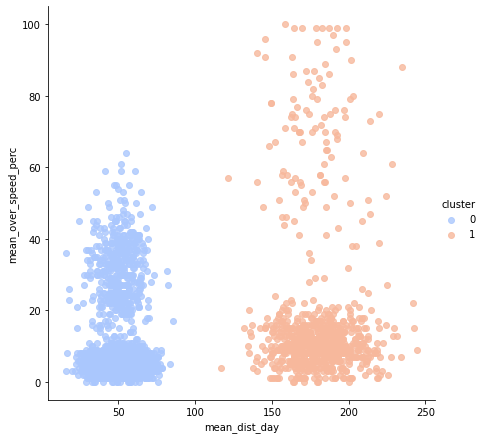

In [23]:
# visualizing the clusters

sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [28]:
# finding the sum of squared distances of samples to their closest cluster center

kmeans.inertia_

1316420.8509477186

In [26]:
kmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [29]:
# printing the final dataset

data

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423311935,71.24,28,0
3423313212,52.53,25,0
3423313724,64.54,27,0
3423311373,55.69,22,0
3423310999,54.58,25,0
...,...,...,...
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1
